### LAB 10-1 비선형 시퀀스를 순환신경망으로 예측하자


In [2]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [3]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [4]:
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

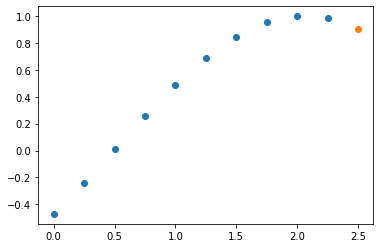

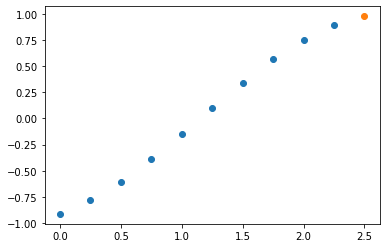

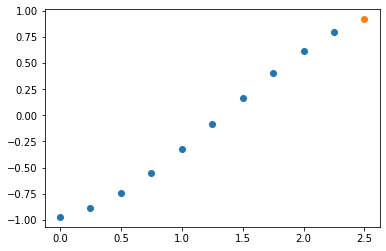

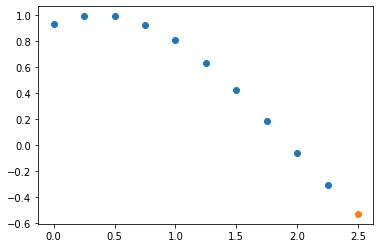

In [5]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [6]:
train_X = seq_X[:80]
train_y = Y[:80]
test_X = seq_X[80:]
test_y = Y[80:]

In [7]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 2s 6ms/step - loss: 0.0500
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0396
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0308
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0233
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0128
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 13/50
3/3 [==============================] - 0s 6ms/step - loss: 0.

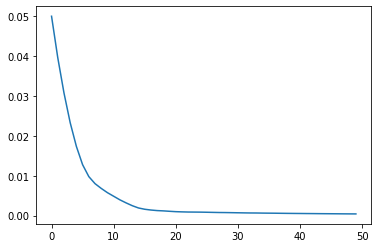

In [8]:
history = simpleRNN_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

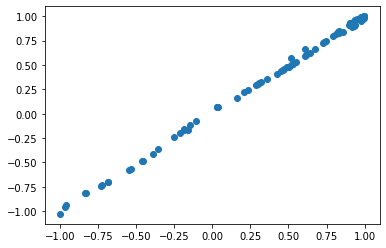

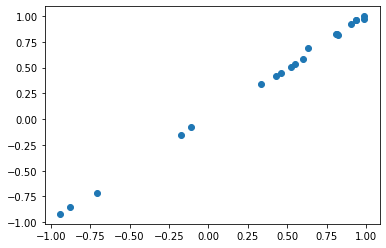

In [9]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

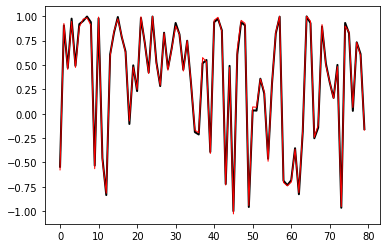

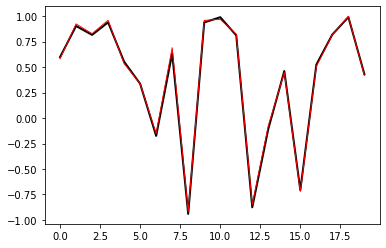

In [10]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)
plt.show()

In [11]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 2s 8ms/step - loss: 0.2352
Epoch 2/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2254
Epoch 3/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2158
Epoch 4/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2075
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1993
Epoch 6/50
3/3 [==============================] - 0s 10ms/step - loss: 0.1913
Epoch 7/50
3/3 [==============================] - 0s 10ms/step - loss: 0.1855
Epoch 8/50
3/3 [==============================] - 0s 11ms/step - loss: 0.1787
Epoch 9/50
3/3 [==============================] - 0s 10ms/step - loss: 0.1727
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1668
Epoch 11/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1607
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 0.1550
Epoch 13/50
3/3 [==============================] - 0s 10ms/step -

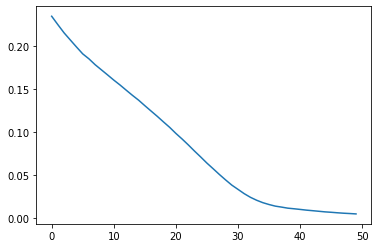

In [12]:
history = LSTM_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

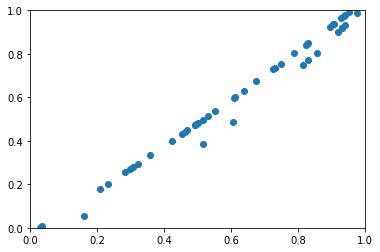

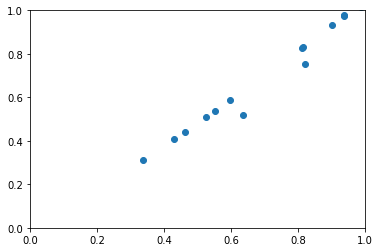

In [13]:
train_y_hat = LSTM_model.predict(train_X)
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(train_y, train_y_hat)
plt.show()
plt.xlim([0,1])
plt.ylim([0,1])
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

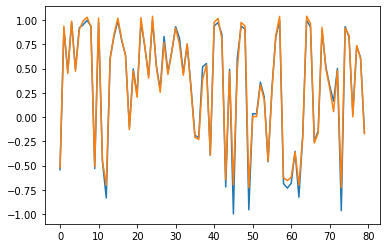

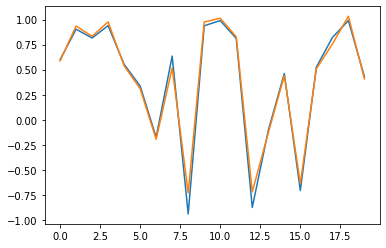

In [14]:
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)

In [15]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

Epoch 1/50
3/3 [==============================] - 5s 17ms/step - loss: 0.3807
Epoch 2/50
3/3 [==============================] - 0s 12ms/step - loss: 0.3618
Epoch 3/50
3/3 [==============================] - 0s 11ms/step - loss: 0.3432
Epoch 4/50
3/3 [==============================] - 0s 11ms/step - loss: 0.3270
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.3132
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.2984
Epoch 7/50
3/3 [==============================] - 0s 11ms/step - loss: 0.2857
Epoch 8/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2750
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 0.2641
Epoch 10/50
3/3 [==============================] - 0s 15ms/step - loss: 0.2563
Epoch 11/50
3/3 [==============================] - 0s 11ms/step - loss: 0.2480
Epoch 12/50
3/3 [==============================] - 0s 11ms/step - loss: 0.2412
Epoch 13/50
3/3 [==============================] - 0s 25ms/st

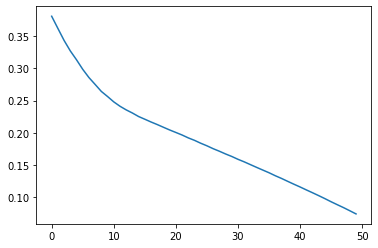

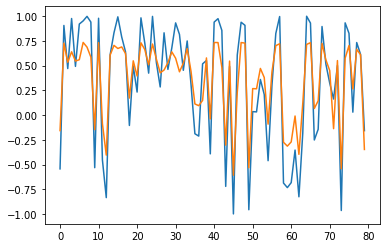

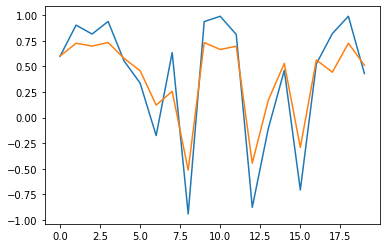

In [16]:
GRU_model.compile(optimizer ='adam', loss = 'mse')
history = GRU_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])
plt.show()

train_y_hat = GRU_model.predict(train_X)
test_y_hat = GRU_model.predict(test_X)
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)
plt.show()

### LAB 10-2 기억이 필요한 시퀀스를 예측해 보자

In [17]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 200, 30
# 비어있는 넘파이 배열을 생성한다.
# 이번에 생성할 데이터는 시퀀스에 인덱스가 있다
seq_X = np.empty(shape=(size, seq_len, 2))
Y = np.empty(shape=(size,))

In [18]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [19]:
shift = np.random.randn(size)
for i in range(size):  # 시퀀스 내의 각 원소에 대해 인덱스와 값을 설정
    seq_X[i,:,0] = np.random.randint(0, 6, size=(seq_len)) # 인덱스 
    seq_X[i,:,1] = np.sin(shift[i] + interval[:-1])        # 값 
    # label은 시퀀스 내에서 짝수 인덱스를 가진 원소의 값을 모두 더한 값
    even_idx = seq_X[i, seq_X[i,:,0]%2 == 0 ]
    Y[i] = even_idx[:,1].sum()

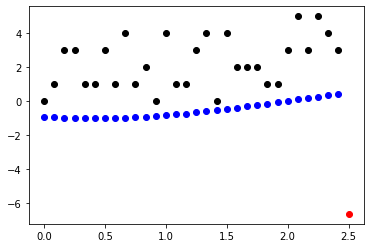

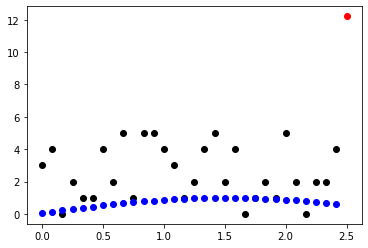

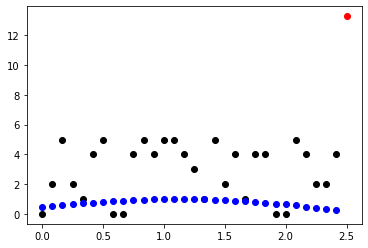

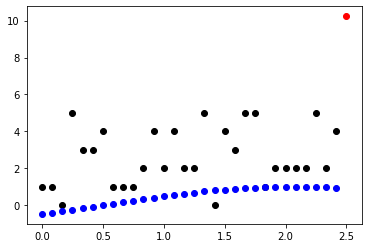

In [20]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :, 0], color='k') # 인덱스 정보
    plt.scatter(interval[:-1], seq_X[i, :, 1], color='b') # 값: 사인 시퀀스
    plt.scatter(interval[-1], Y[i], color='r')
    plt.show()

In [21]:
train_X = seq_X[:180]
train_y = Y[:180]
test_X = seq_X[180:]
test_y = Y[180:]

In [22]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 1s 9ms/step - loss: 78.5181
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 77.0815
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 75.7472
Epoch 4/150
6/6 [==============================] - 0s 7ms/step - loss: 74.4623
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 73.2521
Epoch 6/150
6/6 [==============================] - 0s 8ms/step - loss: 72.0592
Epoch 7/150
6/6 [==============================] - 0s 7ms/step - loss: 70.9400
Epoch 8/150
6/6 [==============================] - 0s 6ms/step - loss: 69.8316
Epoch 9/150
6/6 [==============================] - 0s 7ms/step - loss: 68.7771
Epoch 10/150
6/6 [==============================] - 0s 7ms/step - loss: 67.7150
Epoch 11/150
6/6 [==============================] - 0s 7ms/step - loss: 66.6356
Epoch 12/150
6/6 [==============================] - 0s 6ms/step - loss: 65.5839
Epoch 13/150
6/6 [==============================]

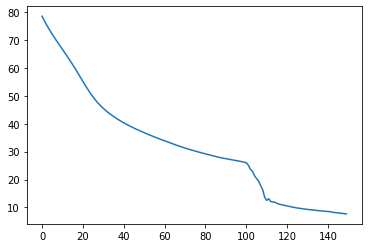

In [23]:
history = simpleRNN_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

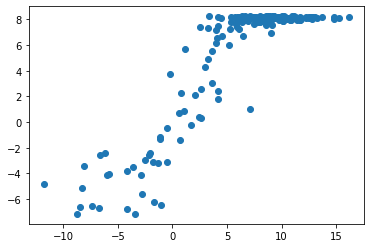

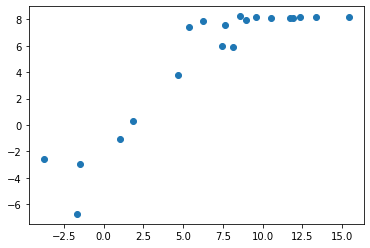

In [24]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

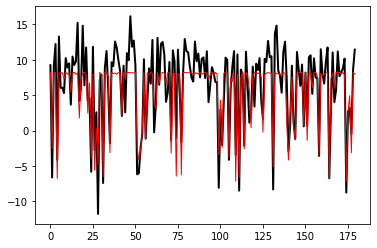

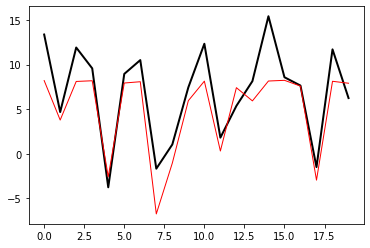

In [25]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [26]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                520       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 13ms/step - loss: 70.0782
Epoch 2/150
6/6 [==============================] - 0s 13ms/step - loss: 68.7929
Epoch 3/150
6/6 [==============================] - 0s 14ms/step - loss: 67.6137
Epoch 4/150
6/6 [==============================] - 0s 13ms/step - loss: 66.4292
Epoch 5/150
6/6 [==============================] - 0s 15ms/step - loss: 65.2795
Epoch 6/150
6/6 [==============================] - 0s 14ms/step - loss: 64.0660
Epoch 7/150
6/6 [==============================] - 0s 14ms/step - loss: 62.7640
Epoch 8/150
6/6 [==============================] - 0s 12ms/step - loss: 61.5205
Epoch 9/150
6/6 [==============================] - 0s 13ms/step - loss: 60.2944
Epoch 10/150
6/6 [==============================] - 0s 13ms/step - loss: 59.0549
Epoch 11/150
6/6 [==============================] - 0s 14ms/step - loss: 57.8019
Epoch 12/150
6/6 [==============================] - 0s 14ms/step - loss: 56.5619
Epoch 13/150
6/6 [===================

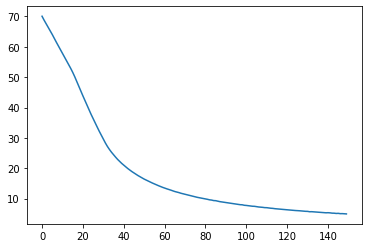

In [27]:
history = LSTM_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

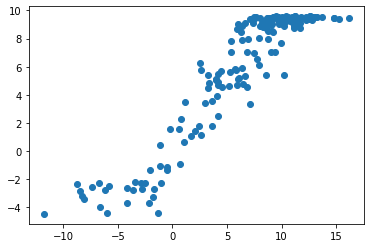

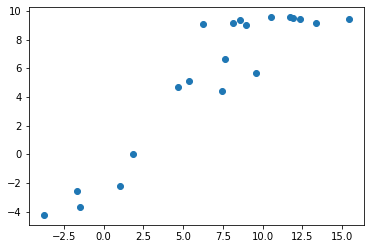

In [28]:
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

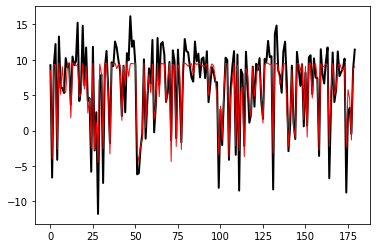

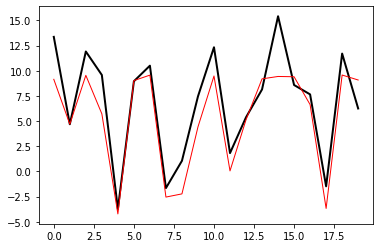

In [29]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [30]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

In [31]:
GRU_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 10)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 16ms/step - loss: 83.4162
Epoch 2/150
6/6 [==============================] - 0s 19ms/step - loss: 81.3413
Epoch 3/150
6/6 [==============================] - 0s 15ms/step - loss: 79.2891
Epoch 4/150
6/6 [==============================] - 0s 16ms/step - loss: 77.2893
Epoch 5/150
6/6 [==============================] - 0s 16ms/step - loss: 75.3763
Epoch 6/150
6/6 [==============================] - 0s 16ms/step - loss: 73.4270
Epoch 7/150
6/6 [==============================] - 0s 17ms/step - loss: 71.3906
Epoch 8/150
6/6 [==============================] - 0s 16ms/step - loss: 69.3555
Epoch 9/150
6/6 [==============================] - 0s 16ms/step - loss: 67.1878
Epoch 10/150
6/6 [==============================] - 0s 16ms/step - loss: 64.8506
Epoch 11/150
6/6 [==============================] - 0s 16ms/step - loss: 62.4528
Epoch 12/150
6/6 [==============================] - 0s 22ms/step - loss: 59.9077
Epoch 13/150
6/6 [===================

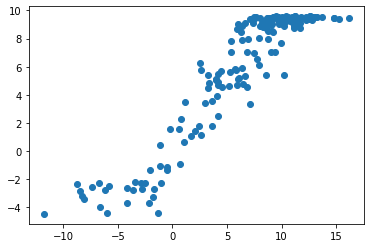

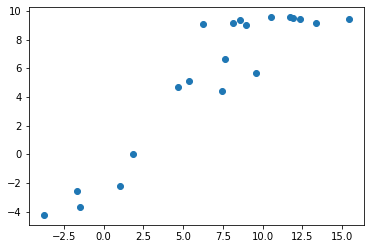

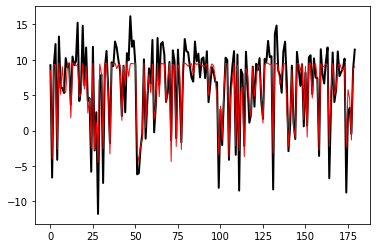

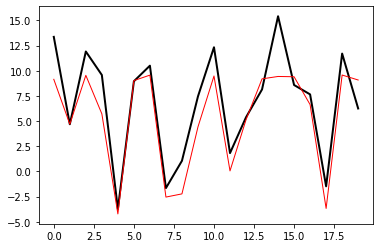

In [32]:
GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_X, train_y, epochs=150)
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)